# Einführung in die Zeitreihenanalyse

Beispiel: Möglicher Einfluss des Klimawandels auf Temperaturen und Niederschläge in Luzern

_CAS Data Science FHNW,  2022-2024, S. Billeter_

**Dieses Skript dient in einer Live-Demonstration zur Erklärung und muss vor einer Anwendung zwingend angepasst werden**

In [ ]:
# Libraries installieren wenn nötig
# Verwendet werden hier pandas, datetime, numpy und matplotlib
# Später wird auch scikit-learn verwendet
# !pip install statsmodels

In [1]:
# Grundlegende Libraries importieren
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

### Schritt 1: Exploration und technische Vorbereitung
Daten untersuchen

*Folie 12*

In [6]:
# Zeitreihendaten einlesen
df_Luzern=pd.read_csv('Daten/Luzern-TS.csv',sep=';')
df_Luzern

,Year,Month,Temperature,Precipitation
0,1864,1,NaN,37.9
1,1864,2,NaN,22.7
2,1864,3,NaN,62.7
3,1864,4,NaN,138.4
4,1864,5,NaN,144.6
...,...,...,...,...
1897,2022,2,4.6,72.9
1898,2022,3,7.1,27.2
1899,2022,4,9.7,77.2
1900,2022,5,16.4,84.7


In [7]:
# Daten erzeugen
df_Luzern['Date']=pd.to_datetime(df_Luzern['Year'].astype(str).str.cat(df_Luzern['Month'].astype(str),sep='-'))
# Die Zeitreihe hat einen Index gesetzt
ts_Luzern=df_Luzern.set_index('Date')
ts_Luzern

,Year,Month,Temperature,Precipitation
Date,,,,
1864-01-01,1864,1,NaN,37.9
1864-02-01,1864,2,NaN,22.7
1864-03-01,1864,3,NaN,62.7
1864-04-01,1864,4,NaN,138.4
1864-05-01,1864,5,NaN,144.6
...,...,...,...,...
2022-02-01,2022,2,4.6,72.9
2022-03-01,2022,3,7.1,27.2
2022-04-01,2022,4,9.7,77.2


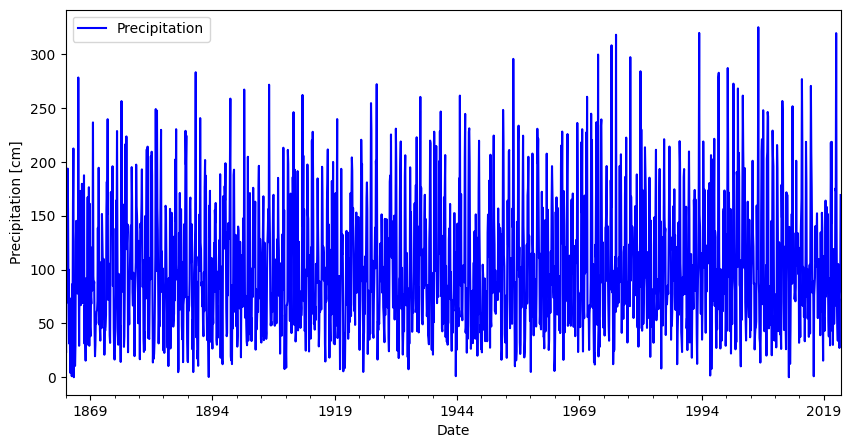

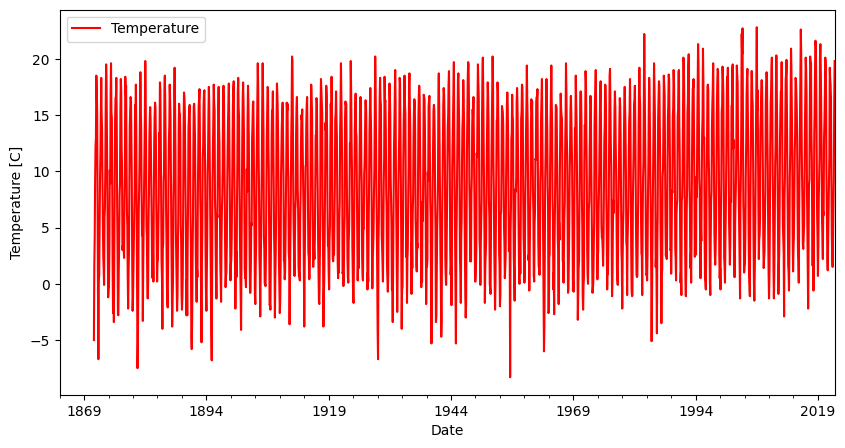

In [8]:
df_Luzern.plot(x='Date',y='Precipitation',ylabel='Precipitation [cm]',color='blue',figsize=(10,5))
df_Luzern.plot(x='Date',y='Temperature',ylabel='Temperature [C]',color='red',figsize=(10,5))
plt.show()

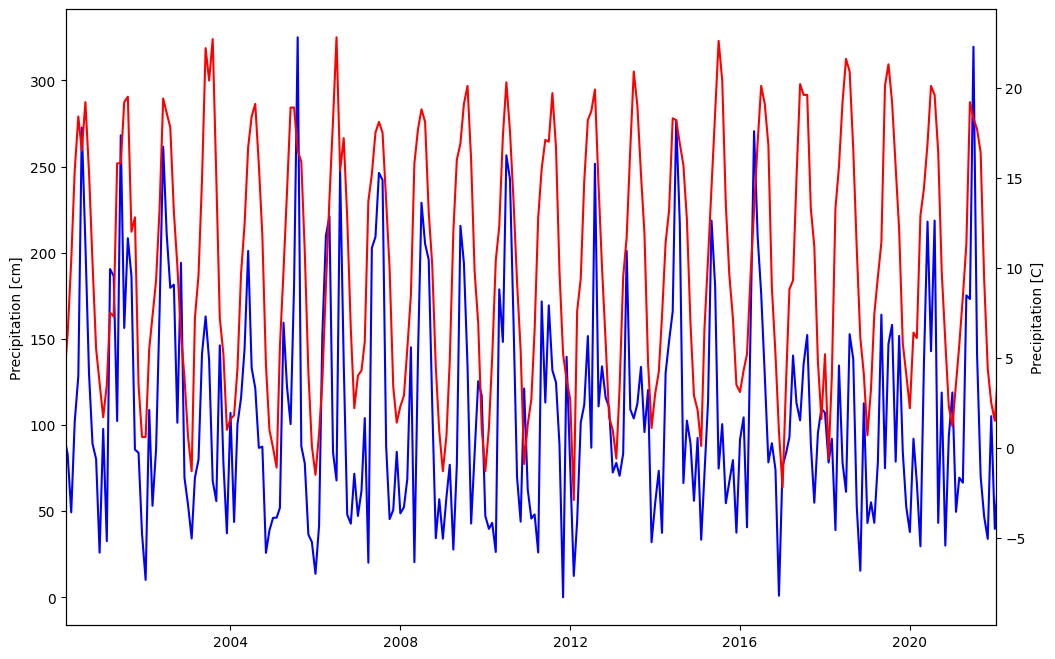

In [9]:
# Dataframe untersuchen
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(df_Luzern.Date,df_Luzern.Precipitation,color='blue')
ax.set_ylabel('Precipitation [cm]')
ax2=ax.twinx()
ax2.plot(df_Luzern.Date,df_Luzern.Temperature,color='red')
ax2.set_ylabel('Precipitation [C]')
plt.xlim([11000,19000])
plt.show()

In [10]:
# Zeitreihe der Temperaturen ab 1900 einpacken
Luzern_Temp=df_Luzern[['Date','Temperature']]
Luzern_Temp=Luzern_Temp.set_index('Date')
Luzern_Temp=Luzern_Temp[Luzern_Temp.index>='1900-01-01']
Luzern_Temp

,Temperature
Date,
1900-01-01,1.2
1900-02-01,2.9
1900-03-01,0.6
1900-04-01,7.1
1900-05-01,11.1
...,...
2022-02-01,4.6
2022-03-01,7.1
2022-04-01,9.7


**Aufgabe:**
Packen Sie die Niederschläge in eine Zeitreihe ein

In [11]:
# Ihre Lösung
Luzern_Prec = df_Luzern[['Date','Precipitation']]
Luzern_Prec = Luzern_Prec.set_index('Date')
Luzern_Prec = Luzern_Prec[Luzern_Prec.index>='1900-01-01']
Luzern_Prec


,Precipitation
Date,
1900-01-01,113.2
1900-02-01,69.4
1900-03-01,65.3
1900-04-01,77.7
1900-05-01,147.8
...,...
2022-02-01,72.9
2022-03-01,27.2
2022-04-01,77.2


**Wir haben hier sehr saubere Daten, ggf. muss zuerst eine lückenlose Zeitskala erzeugt werden**

_Hier einige Tipps zum Umgang mit Lücken (Interpolation s.Zerlegung)_

In [12]:
# Mit Lücken umgehen
# Zeitskala einrichten (hier: ein Wert pro 10 Tage)
Luzern_Zeitreihe=pd.DataFrame(pd.date_range(start="1990-01-01", periods = 120, freq = "10D"),columns=['Date']).set_index('Date')
Luzern_Zeitreihe.head(10)

""
Date
1990-01-01
1990-01-11
1990-01-21
1990-01-31
1990-02-10
1990-02-20
1990-03-02
1990-03-12
1990-03-22


In [13]:
# Daten in die Zeitskala einpassen (hier wenn weniger als 7 Tage entfernt)
Luzern_Zeitreihe=ts_Luzern.reindex(Luzern_Zeitreihe.index, method='nearest',tolerance=datetime.timedelta(days=14)).reset_index()
Luzern_Zeitreihe.head(15)

,Date,Year,Month,Temperature,Precipitation
0,1990-01-01,1990.0,1.0,0.3,23.4
1,1990-01-11,1990.0,1.0,0.3,23.4
2,1990-01-21,1990.0,2.0,6.1,84.3
3,1990-01-31,1990.0,2.0,6.1,84.3
4,1990-02-10,1990.0,2.0,6.1,84.3
5,1990-02-20,1990.0,3.0,7.0,93.1
6,1990-03-02,1990.0,3.0,7.0,93.1
7,1990-03-12,1990.0,3.0,7.0,93.1
8,1990-03-22,1990.0,4.0,7.5,76.4
9,1990-04-01,1990.0,4.0,7.5,76.4


In [14]:
# Vergleich mit dem left merge
Luzern_Zeitreihe.merge(ts_Luzern, on='Date', how='left').set_index('Date').head(15)

,Year_x,Month_x,Temperature_x,Precipitation_x,Year_y,Month_y,Temperature_y,Precipitation_y
Date,,,,,,,,
1990-01-01,1990.0,1.0,0.3,23.4,1990.0,1.0,0.3,23.4
1990-01-11,1990.0,1.0,0.3,23.4,NaN,NaN,NaN,NaN
1990-01-21,1990.0,2.0,6.1,84.3,NaN,NaN,NaN,NaN
1990-01-31,1990.0,2.0,6.1,84.3,NaN,NaN,NaN,NaN
1990-02-10,1990.0,2.0,6.1,84.3,NaN,NaN,NaN,NaN
1990-02-20,1990.0,3.0,7.0,93.1,NaN,NaN,NaN,NaN
1990-03-02,1990.0,3.0,7.0,93.1,NaN,NaN,NaN,NaN
1990-03-12,1990.0,3.0,7.0,93.1,NaN,NaN,NaN,NaN
1990-03-22,1990.0,4.0,7.5,76.4,NaN,NaN,NaN,NaN


In [15]:
# Jetzt müsste ggf. noch interpoliert werden, s. Zerlegung

*Hinweis: Die explorative Datenanalyse ist sehr wichtig. Sie wird hier nur sehr oberflächlich gemacht*

### Schritt 2: Zerlegung
Stochastische und deterministische Komponenten

*Folien 13-19*

In [16]:
# Libraries für Zeitreihenanalyse
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf, ccf
from statsmodels.tsa.stattools import adfuller

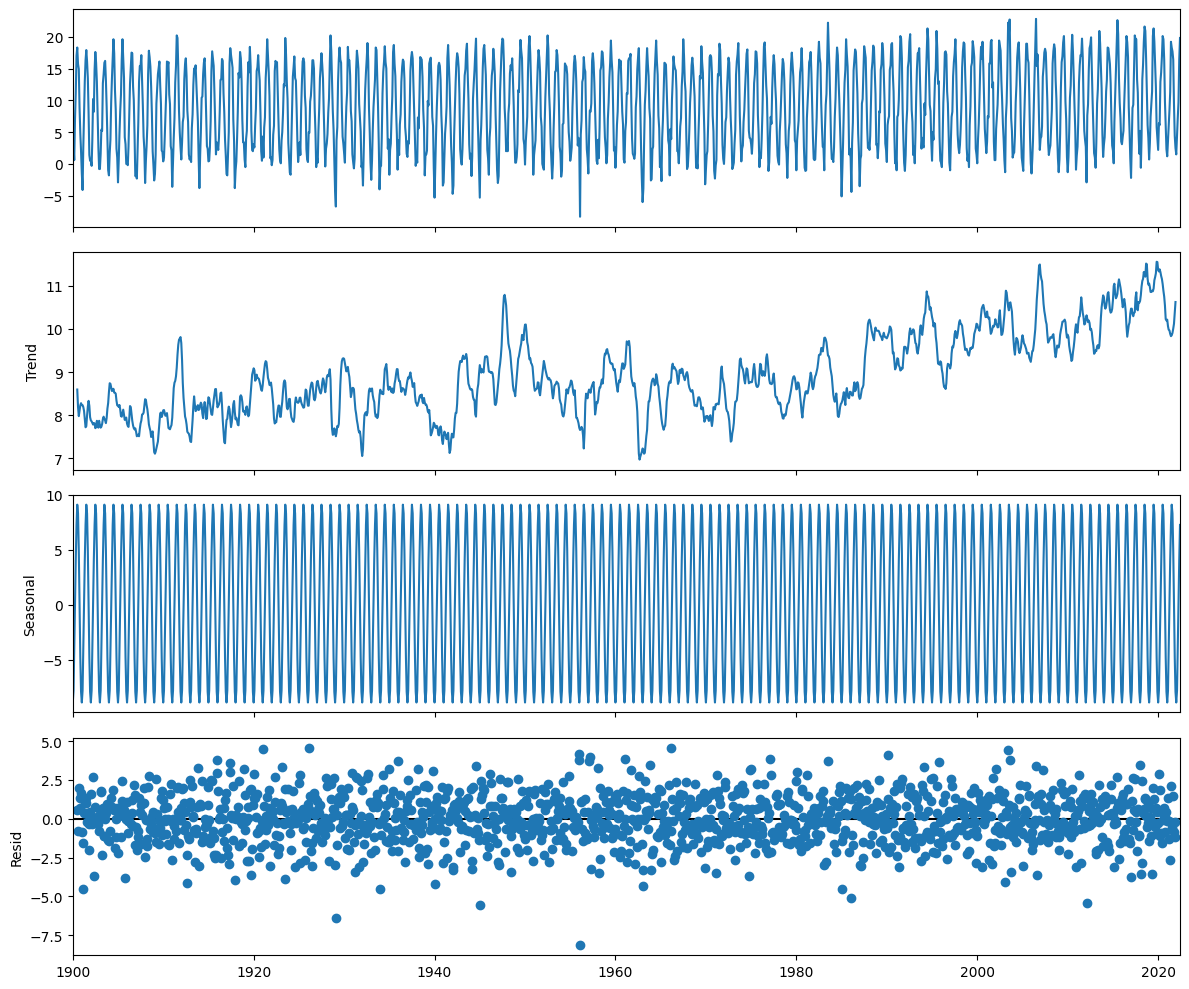

In [17]:
# Zerlegung in Komponenten
Luzern_Temp_Komp=seasonal_decompose(Luzern_Temp, model='additive')
fig=Luzern_Temp_Komp.plot()
fig.set_size_inches(12,10)
fig.tight_layout()
# dir(Luzern_Temp_Komp)
# print(Luzern_Temp.__class__.__name__)
# print(Luzern_Temp_Komp.__class__.__name__)
# print(Luzern_Temp_Komp.resid.__class__.__name__)
#plt.show()

In [18]:
Luzern_Temp_Komp.resid

Date
1900-01-01   NaN
1900-02-01   NaN
1900-03-01   NaN
1900-04-01   NaN
1900-05-01   NaN
              ..
2022-02-01   NaN
2022-03-01   NaN
2022-04-01   NaN
2022-05-01   NaN
2022-06-01   NaN
Name: resid, Length: 1470, dtype: float64

In [19]:
# Die NaNs werden nun entfernt, hier nur am Rand
Temp_Trend=Luzern_Temp_Komp.trend
Temp_Trend=Temp_Trend[Temp_Trend.notnull()]
Temp_Resid=Luzern_Temp_Komp.resid
Temp_Resid=Temp_Resid[Temp_Resid.notnull()]
Temp_Seasonal=Luzern_Temp_Komp.seasonal
Temp_Seasonal=Temp_Seasonal[Temp_Seasonal.notnull()]
Temp_Resid

Date
1900-07-01    0.594613
1900-08-01   -0.808734
1900-09-01    1.990173
1900-10-01    0.669920
1900-11-01    1.358274
                ...   
2021-08-01   -0.525401
2021-09-01    1.461006
2021-10-01   -0.846747
2021-11-01   -1.200059
2021-12-01   -0.209383
Name: resid, Length: 1458, dtype: float64

In [20]:
# Kann die Zeitreihe stationär sein? - Augmented Dickey-Fuller Test
print(adfuller(Temp_Resid,maxlag=1))
print('Mit maxlag=12')
r=adfuller(Temp_Resid,maxlag=12)
print(r)
print(f'p-Wert der Nullhypothese (Residuen): {r[1]:.6f}')

# Mehr Information zu den Outputs
# help(adfuller)

(-29.503441898785557, 0.0, 1, 1456, {'1%': -3.43484922137066, '5%': -2.8635271063560412, '10%': -2.5678279184465946}, 5391.600010670376)
Mit maxlag=12
(-19.66510230321849, 0.0, 12, 1445, {'1%': -3.4348835326305642, '5%': -2.863542248636555, '10%': -2.5678359819686065}, 5021.506085756428)
p-Wert der Nullhypothese (Residuen): 0.000000


(-4.411807167833848, 0.0002828718778682608, 12, 1457, {'1%': -3.434846127900848, '5%': -2.8635257411342616, '10%': -2.5678271914441395}, 5849.717266087986)
p-Wert ganze Zeitreihe: 0.000283


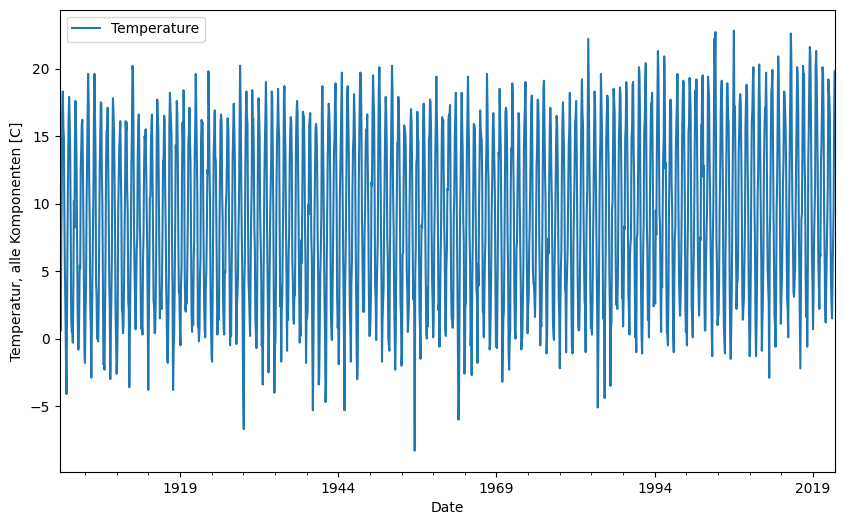

In [21]:
# Könnnte die ganze Zeitreihe stationär sein?
r=adfuller(Luzern_Temp,maxlag=12)
print(r)
print(f'p-Wert ganze Zeitreihe: {r[1]:.6f}')

ax=Luzern_Temp.plot(figsize=(10,6))
ax.set_ylabel('Temperatur, alle Komponenten [C]')
plt.show()

(-2.327431389991958, 0.1632733517884598, 12, 1445, {'1%': -3.4348835326305642, '5%': -2.863542248636555, '10%': -2.5678359819686065}, -2799.306306237165)
p-Wert Trend: 0.163273


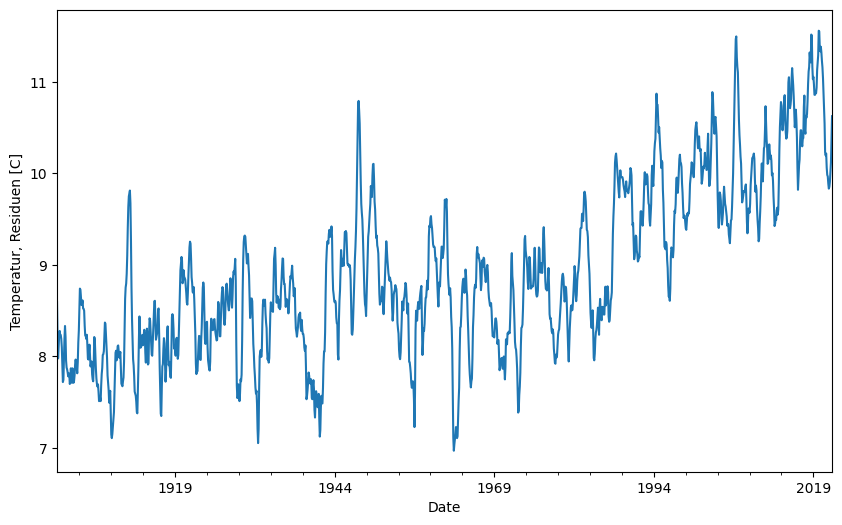

In [24]:
# Trend - Vergleich mit dem Plot des Trends
r=adfuller(Temp_Trend,maxlag=12)
print(r)
print(f'p-Wert Trend: {r[1]:.6f}')

ax=Temp_Trend.plot(figsize=(10,6))
ax.set_ylabel('Temperatur, Residuen [C]')
plt.show()

(-12992441125776.219, 0.0, 10, 1459, {'1%': -3.4348399537053482, '5%': -2.8635230163107837, '10%': -2.5678257404326903}, -73705.95047048444)
p-Wert Trend: 0.000000


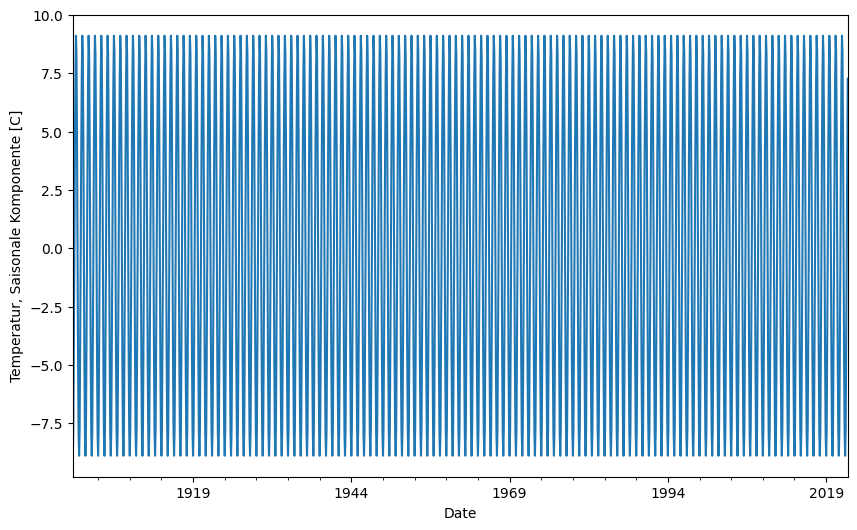

In [25]:
# Saison - Ist dieser Test wirklich sinnvoll?
r=adfuller(Temp_Seasonal,maxlag=12)
print(r)
print(f'p-Wert Trend: {r[1]:.6f}')

ax=Temp_Seasonal.plot(figsize=(10,6))
ax.set_ylabel('Temperatur, Saisonale Komponente [C]')
plt.show()

**Aufgabe:**
Zerlegen Sie die Niederschläge in Komponenten. Welche Komponenten könnten stationär sein?

p-Wert ganze Zeitreihe: 0.000000
p-Wert Residuen: 0.000000
p-Wert Trend: 0.000000


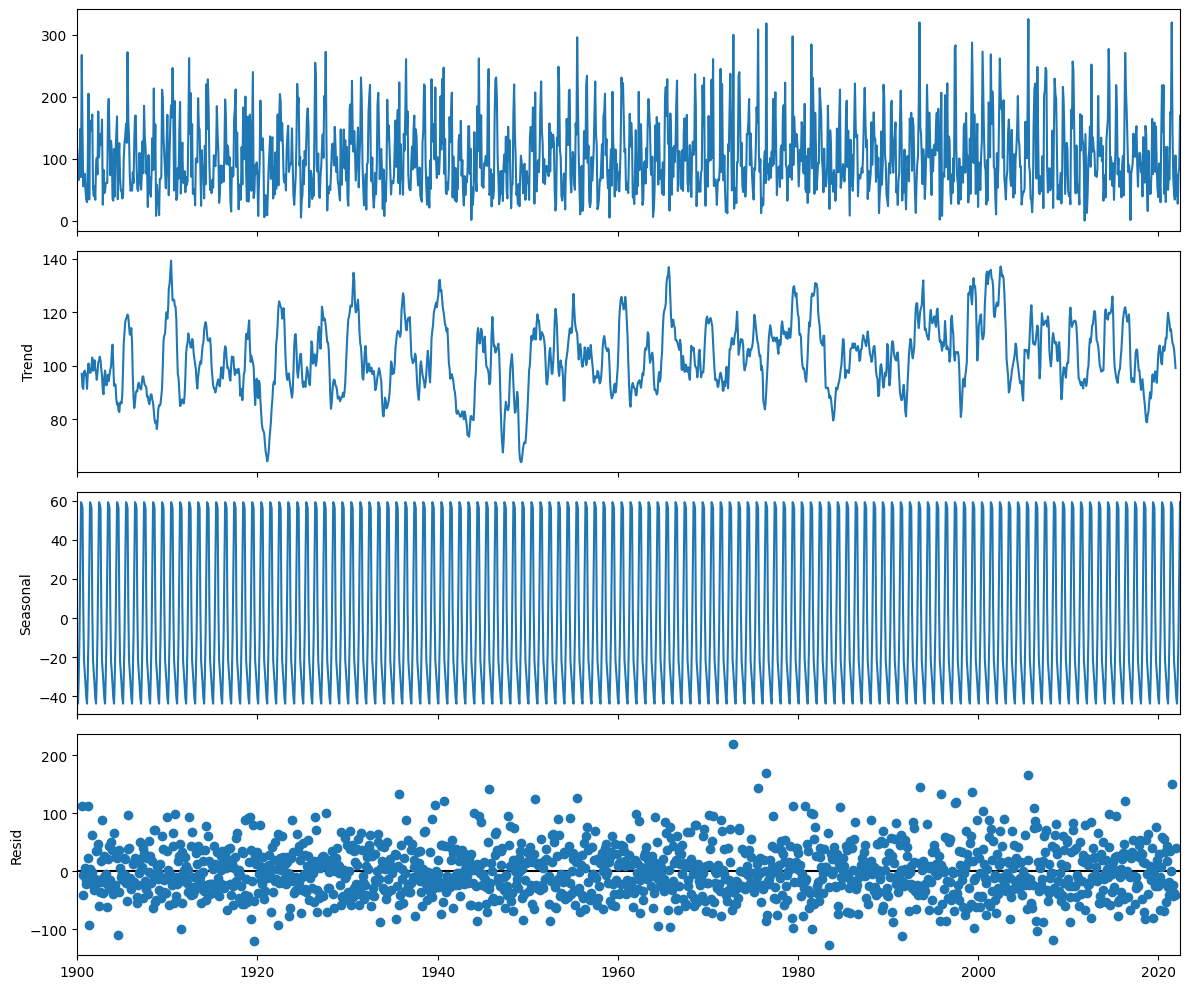

In [23]:
# 1. Zerlegung
Luzern_Nied_Komp = seasonal_decompose(Luzern_Prec, model='additive')
fig=Luzern_Nied_Komp.plot()
fig.set_size_inches(12,10)
fig.tight_layout()

# 2. Entfernung der NaNs
Nied_Trend=Luzern_Nied_Komp.trend
Nied_Trend=Nied_Trend[Nied_Trend.notnull()]
Nied_Resid=Luzern_Nied_Komp.resid
Nied_Resid=Nied_Resid[Nied_Resid.notnull()]
Nied_Seasonal=Luzern_Nied_Komp.seasonal
Nied_Seasonal=Nied_Seasonal[Nied_Seasonal.notnull()]

# 3. Stationaritätstests - Plots s. Zerlegung
r=adfuller(Luzern_Prec,maxlag=12)
print(f'p-Wert ganze Zeitreihe: {r[1]:.6f}')
r=adfuller(Nied_Resid,maxlag=12)
print(f'p-Wert Residuen: {r[1]:.6f}')
r=adfuller(Nied_Trend,maxlag=12)
print(f'p-Wert Trend: {r[1]:.6f}')

**Wir haben hier die NaNs nur am Rand, wir entfernen sie einfach**

_Hier einige Tipps zur Interpolation (NaNs in der Mitte)_

In [ ]:
# Was tun bei Lücken / NaN / etc.
# Reihe in Dataframe umpacken
resid=pd.Series.to_frame(Luzern_Temp_Komp.resid)

# Ween es keine Lücken in den Daten (Index) hat
# Nützliche Befehle: Interpolation und Backfilling
# Allerdings ist hier beides nicht angezeigt:
# - Backfilling: Besser Anfang und Ende entfernen
# - Interpolation: Hier nicht nötig, es braucht zuerst gleichmässig abgetastete Zeit mit lückenhaften Werten (s. oben)
resid.interpolate(method='linear')
# Bitte hier nicht verwenden
resid.fillna(method='bfill')

In [ ]:
# Gleicher Zeitabstand - Interpolation
resid.resample('1Y').mean().interpolate().tail(10)

### Schritt 2a: Manuelle Zerlegung
Oft ist der Gebrauch von Vorwissen und Korrelationen angezeigt. Hier eine Zerlegung mit einem linearen Trend

In [ ]:
# Weitere Libraries für linearen Trend
from sklearn.linear_model import LinearRegression

**Langfrist-Trend**

Einfaches lineares Modell

In [ ]:
# Datum als Zahl
# Einfacher als pd.to_datetime(Luzern_Temp['Date']).dt.year ohne Index
Luzern_Temp.index.year+Luzern_Temp.index.month/12

In [ ]:
Luzern_Temp_Man=Luzern_Temp
Luzern_Temp_Man['Year']=Luzern_Temp_Man.index.year+Luzern_Temp.index.month/12
# Variablen zur Regression
x=pd.to_numeric(Luzern_Temp_Man['Year']).values.reshape(-1,1)
y=Luzern_Temp_Man['Temperature'].values
# x,y

In [ ]:
# Fit des linearen Trends
Temp_Linear=LinearRegression().fit(x,y)
Temp_Linear.score(x,y)
print(x[100,0],y[100])
Temp_Linear.predict(x)

fig,ax=plt.subplots(figsize=(12,8))
ax.scatter(x,y)
_=ax.plot(x,Temp_Linear.predict(x),color='red')

In [ ]:
# Residuen (immer noch mit Saisonalität drin)
Luzern_Temp_Man['Temp_Linear']=Temp_Linear.predict(x)
Luzern_Temp_Man['Resid']=Luzern_Temp_Man['Temperature']-Luzern_Temp_Man['Temp_Linear']

fig,ax=plt.subplots(figsize=(12,6))
x=pd.to_numeric(Luzern_Temp_Man['Year']).values.reshape(-1,1)
y=pd.to_numeric(Luzern_Temp_Man['Temperature']).values.reshape(-1,1)
z=pd.to_numeric(Luzern_Temp_Man['Resid']).values.reshape(-1,1)
ax.scatter(x,y,label='Temperatur')
ax.set_xlabel('Jahr')
ax.set_ylabel('Temperatur [C]')
ax.plot(x,z, color='red',label='Trendbereinigt')
ax.legend()
plt.show()

**Quadratischen Trend auch entfernen**

*Aufpassen mit der Verhersagekraft*

In [ ]:
# Quadratischen Trend herausnehmen - Variablen vorbereiten
Luzern_Temp_Quad=Luzern_Temp
Luzern_Temp_Quad['Year']=Luzern_Temp_Quad.index.year+Luzern_Temp_Quad.index.month/12
# Variablen zur Regression
Luzern_Temp_Quad['Year1']=Luzern_Temp_Quad['Year']-2000
Luzern_Temp_Quad['Year2']=np.square(Luzern_Temp_Quad['Year']-2000)

In [ ]:
# Zeit nach 1950
Luzern_Temp_Quad=Luzern_Temp_Quad[Luzern_Temp_Quad['Year']>1950]

In [ ]:
# Einpacken oder direkt auf dem Data Frame
x=Luzern_Temp_Quad[['Year1','Year2']].values.reshape(-1,2)
y=Luzern_Temp_Quad['Temperature'].values
lm=LinearRegression().fit(x,y)
lm.coef_
# predict(x)

In [ ]:
lm=LinearRegression().fit(Luzern_Temp_Quad[['Year1','Year2']],Luzern_Temp_Quad['Temperature'])
lm.predict(Luzern_Temp_Quad[['Year1','Year2']])
lm.coef_

In [ ]:
fig,ax=plt.subplots(figsize=(12,6))
ax.plot(Luzern_Temp_Quad['Year'],lm.predict(Luzern_Temp_Quad[['Year1','Year2']]))
ax.scatter(Luzern_Temp_Quad['Year'],Luzern_Temp_Quad['Temperature'])
plt.show()

**Die Residuen können weiter zerlegt werden**

_Hier einige Tipps zur weiteren Zerlegung und zu weiteren Zeitskalen_

In [ ]:
# - Zerlegung der trendbereinigten Zeitreihe (Beispiel oben)
# - Resampling der glatten Komponente der trendbereinigten Zeitreihe (Beispiel oben)
# - Analyse auf einer gröberen Zeitskala (Beispiel ganzes Skript)

### Schritt 3: Analyse der Residuen
Korrelogramme

*Folien 20-21*

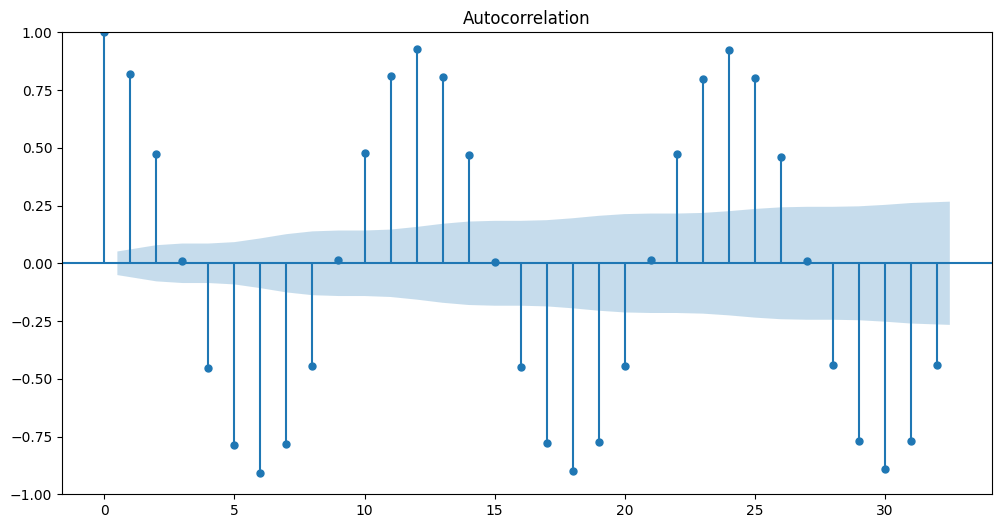

In [26]:
# Autokorrelationsfunktion der Zeitreihe
fig=plot_acf(Luzern_Temp['Temperature'])
fig.set_size_inches(12,6)
plt.show()

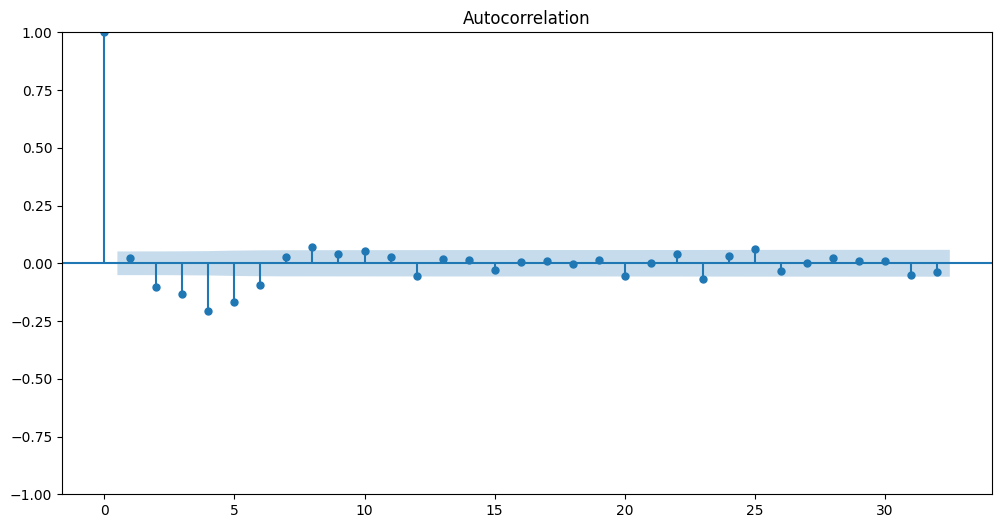

In [27]:
# Autokorrelationsfunktion der Residuen
fig=plot_acf(Temp_Resid)
fig.set_size_inches(12,6)
plt.show()

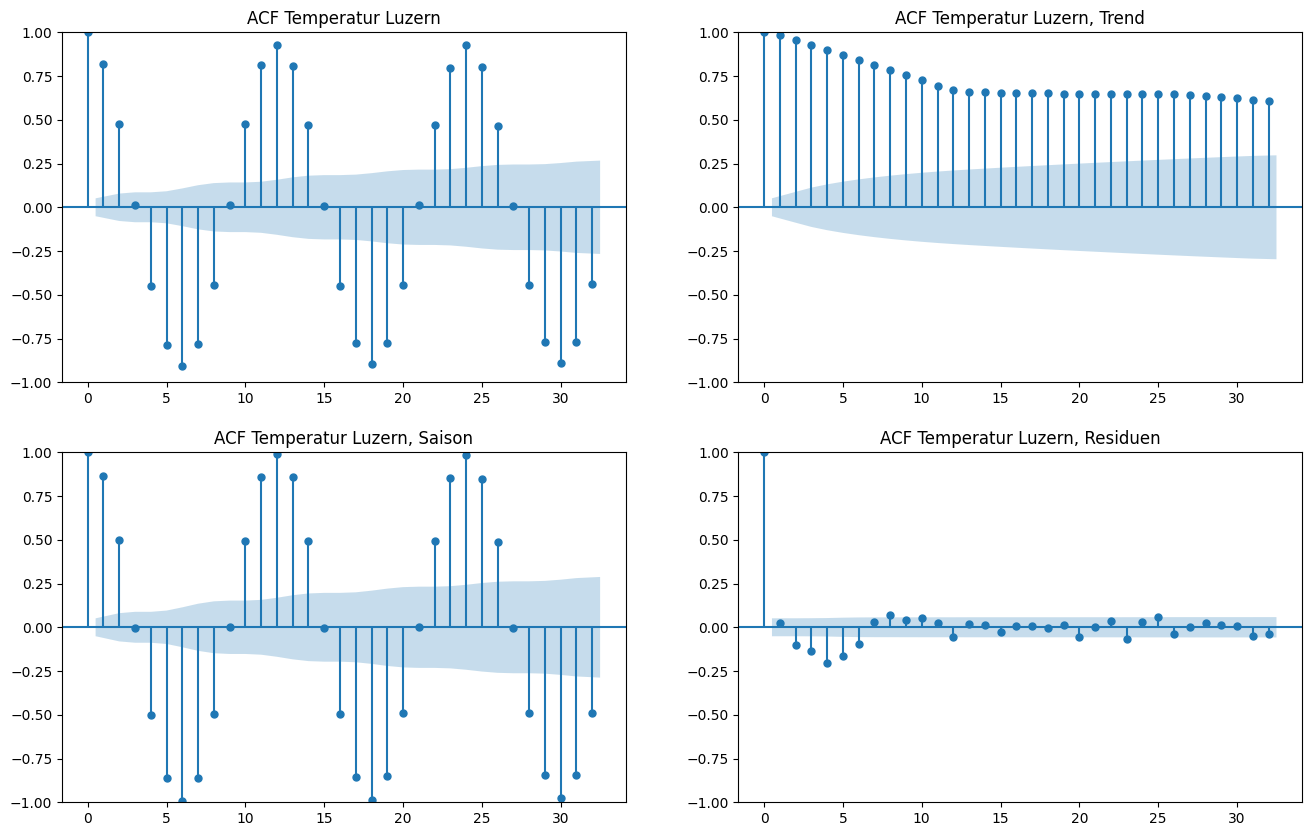

In [28]:
# Von welcher Komponente stammt die beobachtete Korrlation hauptsächlich?
fig,axs=plt.subplots(2,2)
fig.set_size_inches(16,10)
plot_acf(Luzern_Temp['Temperature'],title='ACF Temperatur Luzern',ax=axs[0,0])
plot_acf(Temp_Trend,title='ACF Temperatur Luzern, Trend',ax=axs[0,1])
plot_acf(Temp_Seasonal,title='ACF Temperatur Luzern, Saison',ax=axs[1,0])
plot_acf(Temp_Resid,title='ACF Temperatur Luzern, Residuen',ax=axs[1,1])
plt.show()

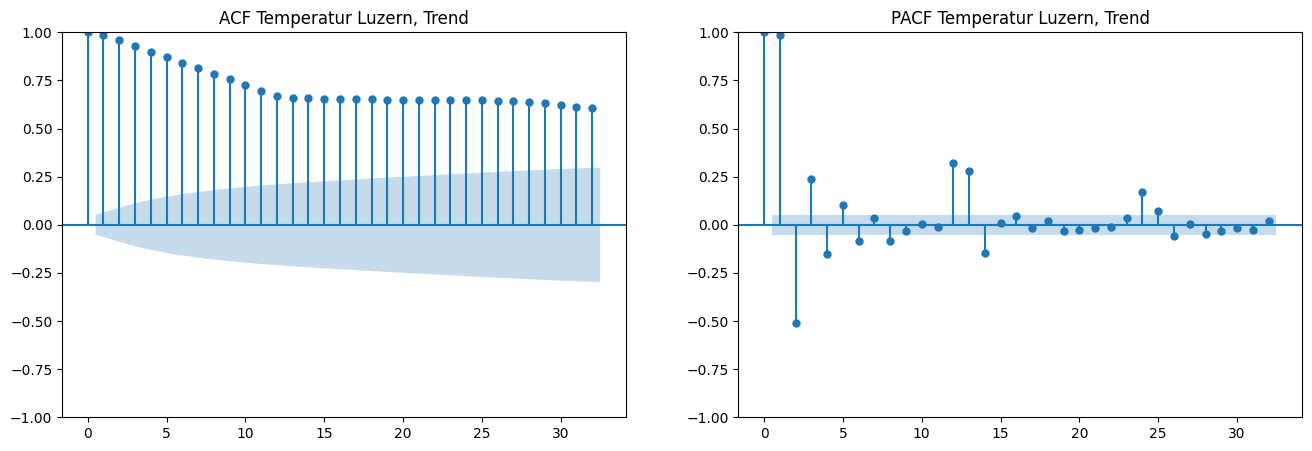

In [29]:
# Partielle Autokorrelationsfunktion (und Autokorrelationsfunktion) des Trends
fig,axs=plt.subplots(1,2)
fig.set_size_inches(16,5)
plot_acf(Temp_Trend,title='ACF Temperatur Luzern, Trend',ax=axs[0])
plot_pacf(Temp_Trend,title='PACF Temperatur Luzern, Trend',ax=axs[1])
plt.show()

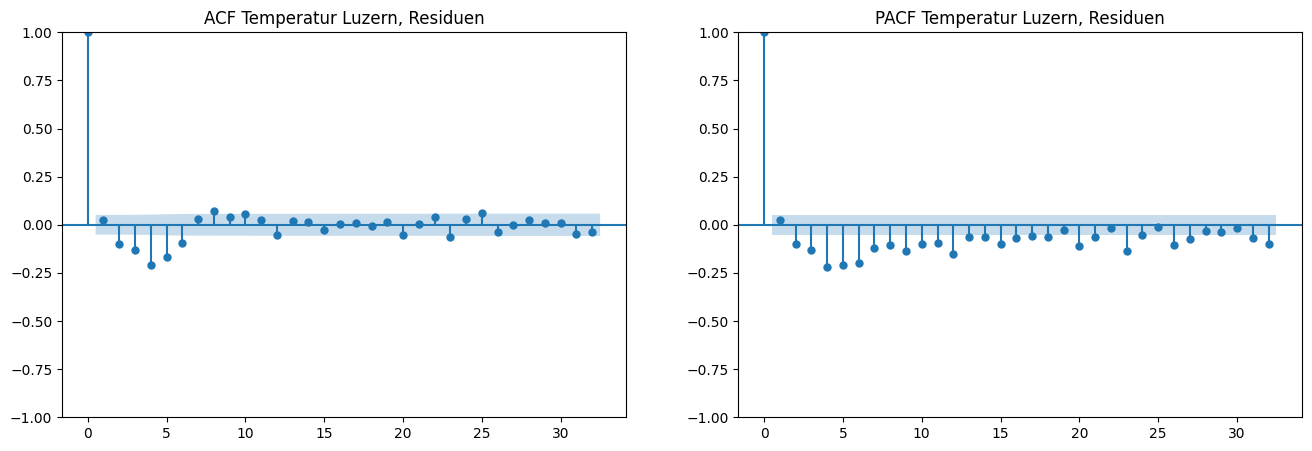

In [30]:
# Partielle Autokorrelationsfunktion (und Autokorrelationsfunktion) der Residuen
fig,axs=plt.subplots(1,2)
fig.set_size_inches(16,5)
plot_acf(Temp_Resid,title='ACF Temperatur Luzern, Residuen',ax=axs[0])
plot_pacf(Temp_Resid,title='PACF Temperatur Luzern, Residuen',ax=axs[1])
plt.show()

<Axes: xlabel='Date'>

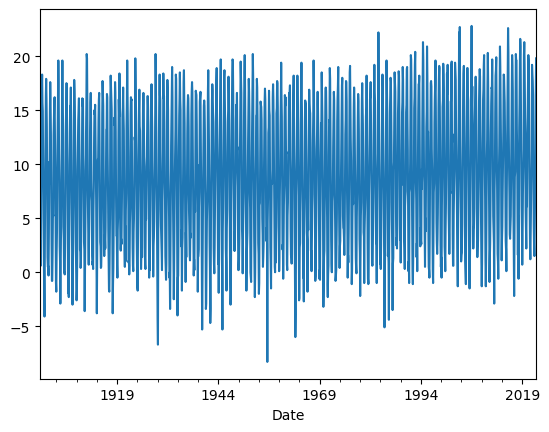

In [31]:
Luzern_Temp_Komp.observed.plot()

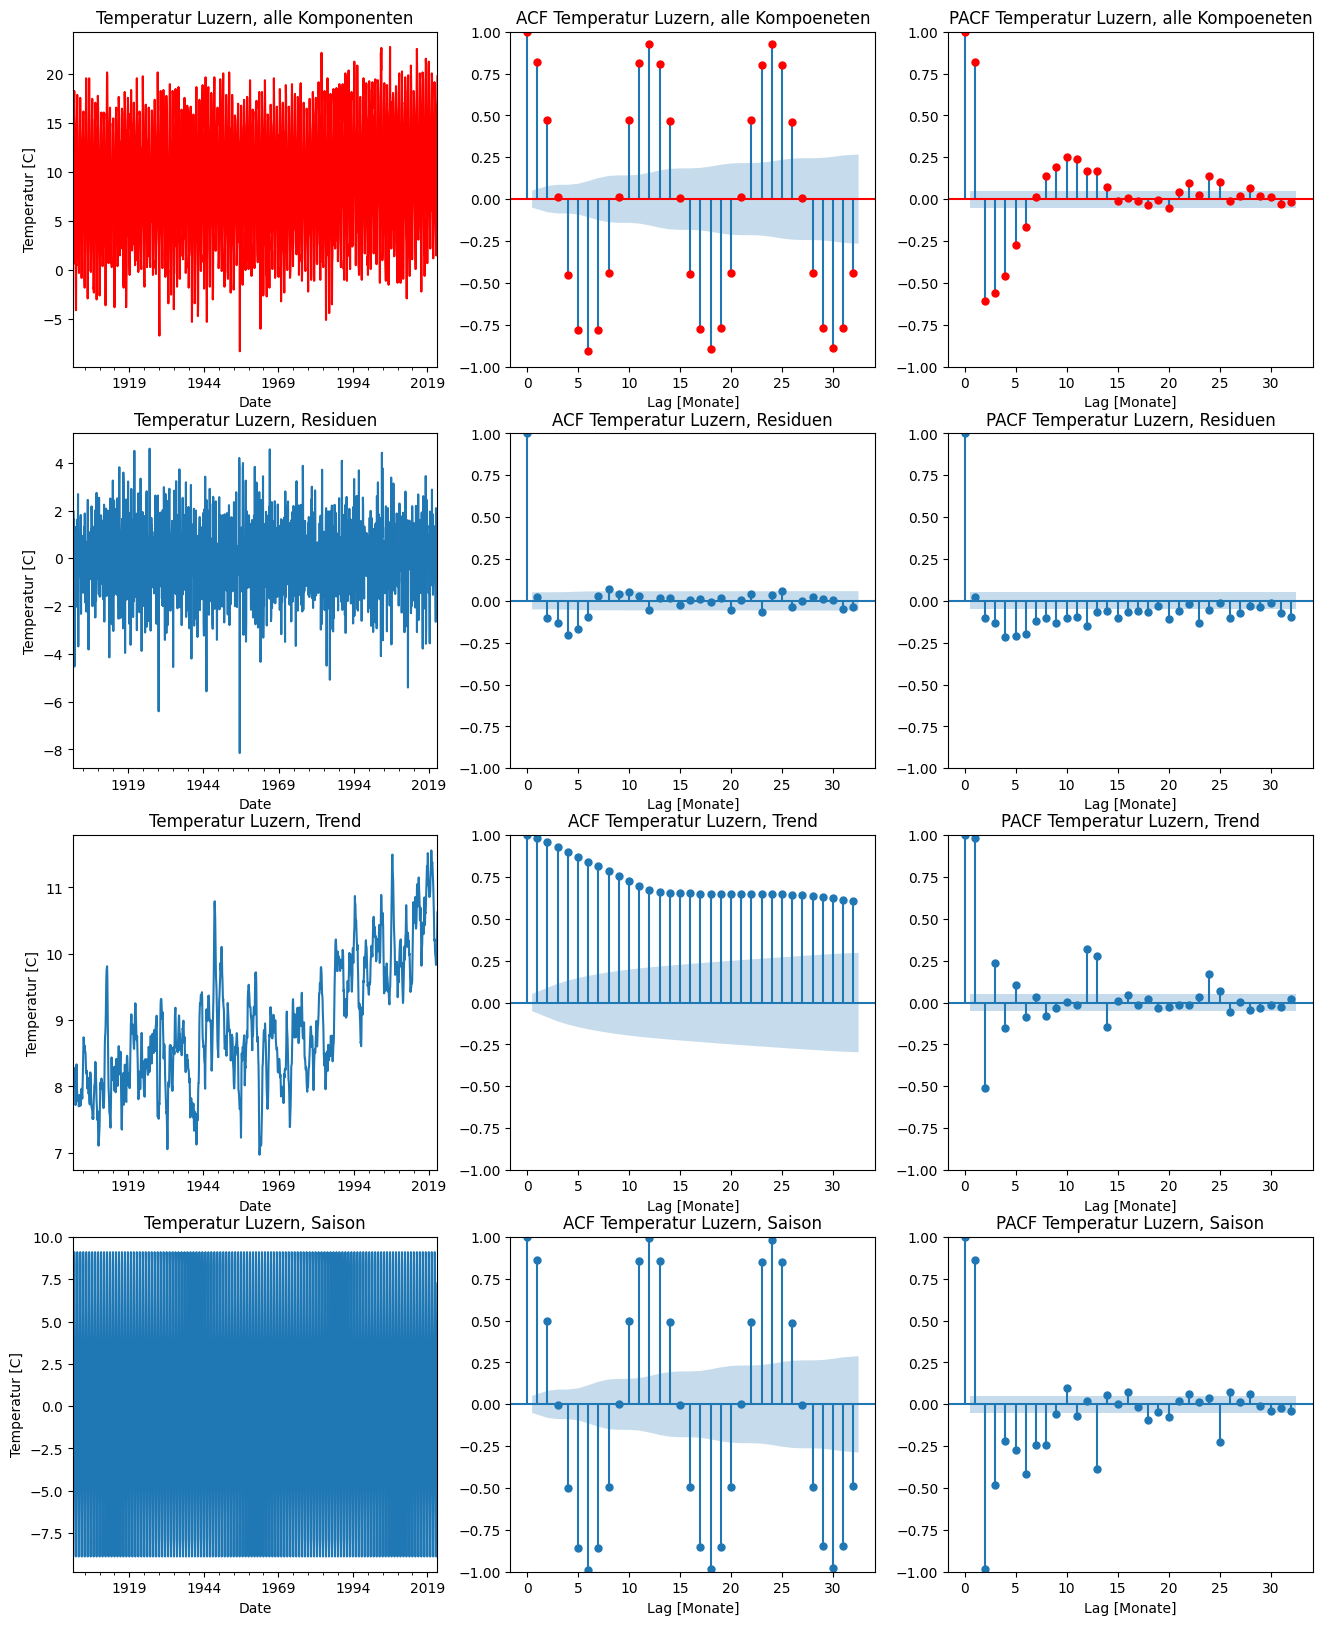

In [32]:
# Zur Interpretation ist ein Vergleich mit der Zeitreihe hilfreich
# Hinweis: Auf den Gebrauch von Iteratoren wurde hier verzichtet
fig,axs=plt.subplots(4,3)
fig.set_size_inches(16,20)

Luzern_Temp_Komp.observed.plot(title='Temperatur Luzern, alle Komponenten',color='red',ax=axs[0,0])
axs[0,0].set_ylabel('Temperatur [C]')
plot_acf(Luzern_Temp['Temperature'],title='ACF Temperatur Luzern, alle Kompoeneten',color='red',ax=axs[0,1])
axs[0,1].set_xlabel('Lag [Monate]')
plot_pacf(Luzern_Temp['Temperature'],title='PACF Temperatur Luzern, alle Kompoeneten',color='red',ax=axs[0,2])
axs[0,2].set_xlabel('Lag [Monate]')

Temp_Resid.plot(title='Temperatur Luzern, Residuen',ax=axs[1,0])
axs[1,0].set_ylabel('Temperatur [C]')
plot_acf(Temp_Resid,title='ACF Temperatur Luzern, Residuen',ax=axs[1,1])
axs[1,1].set_xlabel('Lag [Monate]')
plot_pacf(Temp_Resid,title='PACF Temperatur Luzern, Residuen',ax=axs[1,2])
axs[1,2].set_xlabel('Lag [Monate]')
Temp_Trend.plot(title='Temperatur Luzern, Trend',ax=axs[2,0])
axs[2,0].set_ylabel('Temperatur [C]')
plot_acf(Temp_Trend,title='ACF Temperatur Luzern, Trend',ax=axs[2,1])
axs[2,1].set_xlabel('Lag [Monate]')
plot_pacf(Temp_Trend,title='PACF Temperatur Luzern, Trend',ax=axs[2,2])
axs[2,2].set_xlabel('Lag [Monate]')
Temp_Seasonal.plot(title='Temperatur Luzern, Saison',ax=axs[3,0])
axs[3,0].set_ylabel('Temperatur [C]')
plot_acf(Temp_Seasonal,title='ACF Temperatur Luzern, Saison',ax=axs[3,1])
axs[3,1].set_xlabel('Lag [Monate]')
plot_pacf(Temp_Seasonal,title='PACF Temperatur Luzern, Saison',ax=axs[3,2])
axs[3,2].set_xlabel('Lag [Monate]')
plt.show()

**Aufgabe:**
Analysieren Sie die Autokorrelationsstruktur der Niederschläge. Was lässt sich daraus ablesen?

In [ ]:
# Ihre Lösung

**Welcher Zusammenhang besteht zwischen Temperatur und Niederschlag?**

In [ ]:
# Vorbereitung der Niederschläge für die Kreuzkorrelation
Luzern_Prec=df_Luzern[['Date','Precipitation']]
Luzern_Prec=Luzern_Prec.set_index('Date')
Luzern_Prec=Luzern_Prec[Luzern_Prec.index>='1900-01-01']
Luzern_Nied_Komp=seasonal_decompose(Luzern_Prec, model='additive')
Nied_Trend=Luzern_Nied_Komp.trend
Nied_Trend=Nied_Trend[Nied_Trend.notnull()]
Nied_Resid=Luzern_Nied_Komp.resid
Nied_Resid=Nied_Resid[Nied_Resid.notnull()]
Nied_Seasonal=Luzern_Nied_Komp.seasonal
Nied_Seasonal=Nied_Seasonal[Nied_Seasonal.notnull()]

In [ ]:
# Kreuzkorrelationsfunktion
fig,ax=plt.subplots(figsize=(12,6))
ax.stem(ccf(Temp_Resid,Nied_Resid)[0:24])
ax.set_title('Korrelation Temperatur und Niederschlag')
ax.set_xlabel('Lag')
ax.set_ylabel('CCF')
plt.show()

In [ ]:
# Welches Signal ist zuerst - anhand von Demodaten
fig,[ax1,ax2]=plt.subplots(1,2,figsize=(16,6))
marketing = np.array([3, 4, 5, 5, 7, 9, 13, 15, 12, 10, 8, 8])
revenue = np.array([21, 19, 22, 24, 25, 29, 30, 34, 37, 40, 35, 30])
print(ccf(marketing, revenue, adjusted=False))
print(ccf(revenue, marketing, adjusted=False))
ax1.plot(marketing,color='blue')
ax1.plot(revenue,color='red')
ax1.set_title('Zeitreihen')
ax2.plot(ccf(revenue,marketing)[0:10],color='black')
ax2.plot(ccf(marketing,revenue)[0:10],color='grey')
ax2.set_title('Kreuzkorrelation (Schwarz: blau-rot)')
plt.show()

In [ ]:
# Kreuzkorrelationsfunktion - zeitlicher Zusammenhang
fig,[ax1,ax2]=plt.subplots(1,2,figsize=(16,6))
ax1.stem(ccf(Temp_Resid,Nied_Resid)[0:24])
ax1.set_title('Temperatur auf Niederschlag')
ax2.stem(ccf(Nied_Resid,Temp_Resid)[0:24])
ax2.set_title('Niederschlag auf Temperatur')
plt.show()

In [ ]:
# Beide Vorzeichen der Verzögerung (Kreuzkorrelationsfunktion in R emulieren)
fig,ax=plt.subplots(figsize=(12,6))
ccf_r=ccf(Nied_Resid,Temp_Resid,adjusted=False)[1:26]
ccf_f=ccf(Temp_Resid,Nied_Resid,adjusted=False)[0:25]
ccf_b=np.r_[ccf_r[::-1],ccf_f]
plt.stem(range(-25,25),ccf_b)
plt.show()

In [ ]:
# Auto- und Kreuzkorrelation
fig,ax=plt.subplots()
fig.set_size_inches(12,6)
ax.stem(acf(Nied_Resid)[0:20],label='ACF(Nied(t))')
ax.plot(ccf(Nied_Resid,Nied_Resid,adjusted=False)[0:20],'+',color='green',label='CCF(Nied(t),Nied(t))')
#ax.plot(ccf(Nied_Resid[0:-2],Nied_Resid[1:-1])[0:20],'+',color='green',markersize=10,label='CCF(Nied(t),Nied(t+1))')
#ax.plot(ccf(Temp_Resid,Nied_Resid)[0:20],'*',color='red',markersize=10,label='Temp(t),Nied(t)')
ax.set(xticks=2*np.arange(0,10))
ax.legend()
plt.show()

**Aufgabe:** Was können Sie aus diesen Kreuzkorrelationen herauslesen?

In [ ]:
# Ihre Lösung

**Die statistischen Korrelationen sagen nicht alles aus**

_Brauchen Sie Ihr Vorwissen_

### Schritt 4: Stochastische Modellierung
Stochastische Prozesse und Extremwerte, Vorhersagen

*Folien 23-37*

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# Aus Schritt 3
fig,axs=plt.subplots(1,3)
fig.set_size_inches(16,5)
Temp_Resid.plot(title='Temperatur Luzern, Residuen',ax=axs[0])
plot_acf(Temp_Resid,title='ACF Temperatur Luzern, Residuen',ax=axs[1])
plot_pacf(Temp_Resid,title='PACF Temperatur Luzern, Residuen',ax=axs[2])
plt.show()

In [ ]:
Temp_Modell=ARIMA(Temp_Resid,order=(0,0,4),freq=Temp_Resid.index.inferred_freq)
Temp_resid_fit=Temp_Modell.fit()
print(Temp_resid_fit.summary())

In [ ]:
# Oft in einer ähnlichen form gemacht, aber wie alle "out-of-the-box" Vorhersagen nicht unbedingt empfohlen
Temp_resid_forecast=Temp_resid_fit.get_forecast(12)
# print(Temp_resid_forecast.predicted_mean)
# print(Temp_resid_forecast.conf_int())
conf_int=Temp_resid_forecast.conf_int()

fix,ax=plt.subplots(figsize=(12,6))
Temp_resid_forecast.predicted_mean.plot(ax=ax,label='Vorhersage')
ax.fill_between(conf_int.index,conf_int.iloc[:,0],conf_int.iloc[:,1],alpha=0.1,label='Vertrauensintervall')
ax.legend()
ax.set_xlabel('Datum')
ax.set_ylabel('Residuum Temperatur [C]')
plt.show()

# Test mit Temp_resid_fit.get_prediction()

**Aufgaben:**
1. Finden Sie ein geeignetes ARIMA-Modell der Niederschläge
2. Interpretieren Sie das Ergebnis
3. Schlagen Sie Massnahmen vor, um das Ergebnis aussagekräftiger zu machen

In [ ]:
# Ihre Lösung

**Anwendungen**
_Ausserhalb dieses Skripts (kein Standardvorgehen)_

*Folien 35-37*

- Vorhersagen
- Bedingte Vorhersagen
- Weiterverwendung in anderen Modellen
- Extremwertanalysen


### Vorhersagen
Hier kommt alles zusammen

*Einige Beispiele, es müssen unbedingt an die Problemstellungen angepasst werden*

In [ ]:
# Hier arbeiten wir mit der ganz einfachen Dekomposition von oben
Luzern_Temp_Man['Seasonal']=Temp_Seasonal
Luzern_Temp_Man['Resid_Seasonal']=Luzern_Temp_Man['Temperature']-Luzern_Temp_Man['Seasonal']-Luzern_Temp_Man['Temp_Linear']

In [ ]:
# Wir charakterisieren die Komponenten wie oben
fig,axs=plt.subplots(4,3)
fig.set_size_inches(16,20)
Luzern_Temp_Man['Temperature'].plot(title='Temperatur Luzern, alle Komponenten',color='red',ax=axs[0,0])
axs[0,0].set_ylabel('Temperatur [C]')
plot_acf(Luzern_Temp_Man['Temperature'],title='ACF Temperatur Luzern, alle Kompoeneten',color='red',ax=axs[0,1])
axs[0,1].set_xlabel('Lag [Monate]')
plot_pacf(Luzern_Temp_Man['Temperature'],title='PACF Temperatur Luzern, alle Kompoeneten',color='red',ax=axs[0,2])
axs[0,2].set_xlabel('Lag [Monate]')
Luzern_Temp_Man['Resid_Seasonal'].plot(title='Temperatur Luzern, Residuen',ax=axs[1,0])
axs[1,0].set_ylabel('Temperatur [C]')
plot_acf(Luzern_Temp_Man['Resid_Seasonal'],title='ACF Temperatur Luzern, Residuen',ax=axs[1,1])
axs[1,1].set_xlabel('Lag [Monate]')
plot_pacf(Luzern_Temp_Man['Resid_Seasonal'],title='PACF Temperatur Luzern, Residuen',ax=axs[1,2])
axs[1,2].set_xlabel('Lag [Monate]')
Luzern_Temp_Man['Temp_Linear'].plot(title='Temperatur Luzern, Trend',ax=axs[2,0])
axs[2,0].set_ylabel('Temperatur [C]')
plot_acf(Luzern_Temp_Man['Temp_Linear'],title='ACF Temperatur Luzern, Trend',ax=axs[2,1])
axs[2,1].set_xlabel('Lag [Monate]')
plot_pacf(Luzern_Temp_Man['Temp_Linear'],title='PACF Temperatur Luzern, Trend',ax=axs[2,2])
axs[2,2].set_xlabel('Lag [Monate]')
Luzern_Temp_Man['Seasonal'].plot(title='Temperatur Luzern, Saison',ax=axs[3,0])
axs[3,0].set_ylabel('Temperatur [C]')
plot_acf(Luzern_Temp_Man['Seasonal'],title='ACF Temperatur Luzern, Saison',ax=axs[3,1])
axs[3,1].set_xlabel('Lag [Monate]')
plot_pacf(Luzern_Temp_Man['Seasonal'],title='PACF Temperatur Luzern, Saison',ax=axs[3,2])
axs[3,2].set_xlabel('Lag [Monate]')
plt.show()

In [ ]:
# Warum nehmen wir für die Residuen ein AR(1)-Modell?
Luzern_Temp_Man_Modell=ARIMA(Luzern_Temp_Man['Resid_Seasonal'],order=(1,0,0),freq=Luzern_Temp_Man.index.inferred_freq).fit()
Luzern_Temp_Man_Modell.summary()

In [ ]:
# Was war die Temperatur am 1. Juni 2030?
print(f"Temperatur: {Luzern_Temp_Man['Temperature']['2021-06-01']:.3f} Grad C")

In [ ]:
# Welche Komponenten trugen wie viel bei?
print(f"Trend: {Luzern_Temp_Man['Temp_Linear']['2021-06-01']:.3f}, Saison: {Luzern_Temp_Man['Seasonal']['2021-06-01']:.3f}, Residuen: {Luzern_Temp_Man['Resid_Seasonal']['2021-06-01']:.3f} Grad C")

In [ ]:
# Welche Temperatur ist am 1.Juni 2030 zu erwarten, falls die Temperatur linear mit der gleichen Rate wie zwischen 1900 und 2021 zunehmen wird?
t=[[2030+(31+28+31+30+31)/365.24]]
T_t=Temp_Linear.predict(t)[0] # Trend
S_t=Luzern_Temp_Man['Seasonal']['2021-06-01'] # Saisonalität
R_t=0.0 # Residuum. Warum 0?
print(f"Temperatur: {T_t+S_t+R_t:.3f} Grad C")
print(f"Trend: {T_t:.3f}, Saison: {S_t:.3f} Grad C")

In [ ]:
# Wie könnte es sonst noch kommen?
# Warum geht der vorhergesagte Wert so schnell nach 0?
sd=np.sqrt(Luzern_Temp_Man_Modell.params['sigma2'])
print(f"Standardabweichung: {sd:.3f} Grad C")
plt.plot(Luzern_Temp_Man_Modell.get_forecast(96).predicted_mean)
plt.show()

**Aufgaben:**

1. Am 1. Mai 2030 sei es 20.1 Grad C. Welche Temperatur ist am 1. Juni 2030 zu erwarten?
2. Was sagen die Residuen der Jahre 2000 bis 2021 über das Modell aus? Welche Komponente muss vor allem verbessert werden?